In [1]:
using Plots, TaylorSeries, TaylorIntegration, LinearAlgebra

[ Info: Precompiling TaylorIntegration [92b13dbe-c966-51a2-8445-caca9f8a7d42] (cache misses: include_dependency fsize change (6), wrong source (2))
┌ Warning: Replacing docs for `TaylorIntegration.taylorinteg :: Union{}` in module `TaylorIntegration`
└ @ Base.Docs docs\Docs.jl:243


In [2]:
include("..\\src\\DynamicalBosons.jl");

---

## Hamiltoniano del sistema

$$H_{cl} = (\epsilon_{1} - \epsilon_{3})N_{1} + (\epsilon_{2} - \epsilon_{3})N_{2} + \epsilon_{3}N - 2 J_{12} \sqrt{N_{1}N_{2}}\cos(\theta_{1} - \theta_{2}) - 2 J_{13} \sqrt{N_{1}(N - N_{1} - N_{2})}\cos(\theta_{1}) - 2 J_{23} \sqrt{N_{2}(N - N_{1} - N_{2})}\cos(\theta_{2}),$$

In [240]:
function H(x, p)

    ϵ₁, ϵ₂, ϵ₃ , J₁₂, J₂₃, J₃₁, N = p
    
    N₁, N₂, θ₁, θ₂ = x
    
    n₃ = N - N₁ - N₂

    H₀ = (ϵ₁ - ϵ₃)*N₁ + (ϵ₂ - ϵ₃)*N₂ + ϵ₃*N

    W = - 2.0*J₁₂*sqrt(N₁*N₂)*cos(θ₁ - θ₂) - 2.0*J₂₃*sqrt(N₂*n₃)*cos(θ₂) - 2.0*J₃₁*sqrt(N₁*n₃)*cos(θ₁)

    return  H₀ + W

end

H (generic function with 1 method)

---

## Ecuaciones dinámicas

$\dot{N}_{1} = \dfrac{\partial H_{cl}}{\partial \theta_{1}} = 2J_{12}\sqrt{N_{1}N_{2}}\sin(\theta_{1} - \theta_{2}) + 2J_{13}\sqrt{N_{1}(N - N_{1} - N_{2})}\sin(\theta_{1})$

$\dot{N}_{2} = \dfrac{\partial H_{cl}}{\partial \theta_{2}} = - 2J_{12}\sqrt{N_{1}N_{2}}\sin(\theta_{1} - \theta_{2}) + 2J_{23}\sqrt{N_{2}(N - N_{1} - N_{2})}\sin(\theta_{2})$

$\dot{\theta}_{1} = - \dfrac{\partial H_{cl}}{\partial N_{1}} = \epsilon_{3} - \epsilon_{1} + J_{12}\sqrt{\dfrac{N_{2}}{N_{1}}}\cos(\theta_{1}-\theta_{2}) + J_{13}\sqrt{\dfrac{N - N_{1} - N_{2}}{N_{1}}}\cos(\theta_{1}) - J_{13}\sqrt{\dfrac{N_{1}}{N - N_{1} - N_{2}}}\cos(\theta_{1}) - J_{23}\sqrt{\dfrac{N_{2}}{N - N_{1} - N_{2}}}\cos(\theta_{2}) $

$\dot{\theta}_{2} = - \dfrac{\partial H_{cl}}{\partial N_{2}} = \epsilon_{3} - \epsilon_{2} + J_{12}\sqrt{\dfrac{N_{1}}{N_{2}}}\cos(\theta_{1}-\theta_{2}) + J_{23}\sqrt{\dfrac{N - N_{1} - N_{2}}{N_{2}}}\cos(\theta_{2}) - J_{23}\sqrt{\dfrac{N_{2}}{N - N_{1} - N_{2}}}\cos(\theta_{2}) - J_{13}\sqrt{\dfrac{N_{1}}{N - N_{1} - N_{2}}}\cos(\theta_{1}) $

In [241]:
function f!(dx, x, p, t)
    
    ϵ₁, ϵ₂, ϵ₃ , J₁₂, J₂₃, J₃₁, N = p
    
    N₁, N₂, θ₁, θ₂ = x
    
    n₃ = N - N₁ - N₂

    θ₁₂ = θ₁ - θ₂

    sqrt_N₁N₂ = sqrt(N₁*N₂)
    
    sqrt_N₁n₃ = sqrt(N₁/n₃)
    sqrt_N₂n₃ = sqrt(N₂/n₃)
    
    dx[1] =   2.0*J₁₂*sqrt_N₁N₂*sin(θ₁₂) + 2.0*J₃₁*sqrt(N₁*n₃)*sin(θ₁)

    dx[2] = - 2.0*J₁₂*sqrt_N₁N₂*sin(θ₁₂) + 2.0*J₂₃*sqrt(N₂*n₃)*sin(θ₂)

    dx[3] = ϵ₃ - ϵ₁ + J₁₂*sqrt(N₂/N₁)*cos(θ₁₂) + J₃₁*sqrt(n₃/N₁)*cos(θ₁) - J₃₁*sqrt_N₁n₃*cos(θ₁) - J₂₃*sqrt_N₂n₃*cos(θ₂)

    dx[4] = ϵ₃ - ϵ₂ + J₁₂*sqrt(N₁/N₂)*cos(θ₁₂) + J₂₃*sqrt(n₃/N₂)*cos(θ₂) - J₂₃*sqrt_N₂n₃*cos(θ₂) - J₃₁*sqrt_N₁n₃*cos(θ₁)

    return dx

end

f! (generic function with 1 method)

In [373]:
N = 30

ϵ₁ =  0.1
ϵ₂ =  0.0
ϵ₃ = -0.1

J₁₂ = 0.5
J₂₃ = 0.5
J₃₁ = 0.0

0.0

In [374]:
Plims = (-π, Float64(π))
params = [ϵ₁, ϵ₂, ϵ₃ , J₁₂, J₂₃, J₃₁, N]
tol = 1.e-12
ite = 10
nrand = 10000

10000

In [428]:
N1 = rand(2:(N-2))
θ1 = -π + rand()*2*π

N2 = rand(1:(N - N1 - 1))
θ2 = -π + rand()*2*π

x_ini = [N1, N2, θ1, θ2]

4-element Vector{Float64}:
 21.0
  3.0
  2.4281916501107323
 -0.06112755272641346

LoadError: MethodError: no method matching zero(::TaylorSolution{Float64, Float64, 2, SubArray{Float64, 1, Vector{Float64}, Tuple{UnitRange{Int64}}, true}, SubArray{Float64, 2, Transpose{Float64, SubArray{Float64, 2, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, UnitRange{Int64}}, true}}, Tuple{UnitRange{Int64}, Base.Slice{Base.OneTo{Int64}}}, false}, SubArray{Taylor1{Float64}, 2, Transpose{Taylor1{Float64}, SubArray{Taylor1{Float64}, 2, Matrix{Taylor1{Float64}}, Tuple{Base.Slice{Base.OneTo{Int64}}, UnitRange{Int64}}, true}}, Tuple{UnitRange{Int64}, Base.Slice{Base.OneTo{Int64}}}, false}, Nothing, Nothing, Nothing})
The function `zero` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  zero([91m::Type{Union{}}[39m, Any...)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:310[24m[39m
[0m  zero([91m::Type{Dates.Time}[39m)
[0m[90m   @[39m [32mDates[39m [90mC:\Users\leoml\.julia\juliaup\julia-1.11.2+0.x64.w64.mingw32\share\julia\stdlib\v1.11\Dates\src\[39m[90m[4mtypes.jl:460[24m[39m
[0m  zero([91m::Type{LibGit2.GitHash}[39m)
[0m[90m   @[39m [32mLibGit2[39m [90mC:\Users\leoml\.julia\juliaup\julia-1.11.2+0.x64.w64.mingw32\share\julia\stdlib\v1.11\LibGit2\src\[39m[90m[4moid.jl:221[24m[39m
[0m  ...


In [435]:
push!(A, sol)

5-element Vector{TaylorSolution}:
 tspan: (0.0, 50.0), x: 4 Float64 variables
 tspan: (0.0, 0.1), x: 4 Float64 variables
 tspan: (0.0, 0.1), x: 4 Float64 variables
 tspan: (0.0, 0.1), x: 4 Float64 variables
 tspan: (0.0, 8.373384348338607), x: 4 Float64 variables

In [434]:
sol = taylorinteg(f!, x_ini, 0.0, 10.0, 20, 1.e-20, params, maxsteps = 100)
Energias = [H(sol.x[i, :], params) for i in 1:length(sol.t)]

println("Energía inicial : $(Energias[1])")
println("Máximo error de energía : $(maximum(abs.(Energias .- Energias[1])))")

┌ Warning: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration C:\Users\leoml\.julia\dev\TaylorIntegration\src\integrator\taylorinteg.jl:170


Energía inicial : 3.573065702506825
Máximo error de energía : 2.3092638912203256e-14


In [377]:
xcr, Elims = CriticalEnergy(H, Plims, params, tol, ite, nrand);

In [378]:
Elims

(-21.42428528562855, 21.424285285628546)

In [379]:
θ = 0.0

α = 0.7

E = Elims[1] + α*(Elims[2] - Elims[1])

nrvar = 2

2

In [380]:
function g!(x, Q, P, params)

    x[1] = Q
    x[2] = 0.0
    x[3] = P
    x[4] = θ

end

g! (generic function with 1 method)

El número de puntos con la energía deseada es 188


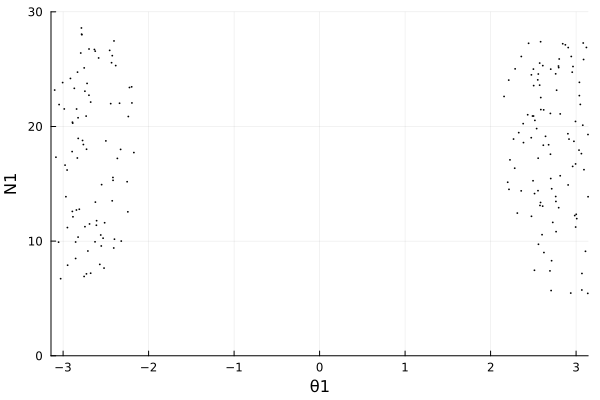

In [382]:
nrand = 1000
psr = PhaseSpace(H, g!, E, nrand, Plims, params, nrvar, tol, ite; nrdivs = 100)
println("El número de puntos con la energía deseada es $(size(psr, 1))")
scatter(psr[:, 3], psr[:, 1], ylims = (0, N), xlims = (-π,π), leg = false, xlabel = "θ1", ylabel = "N1", ms = 1.0, color = "black")

El número de puntos con la energía deseada es 200


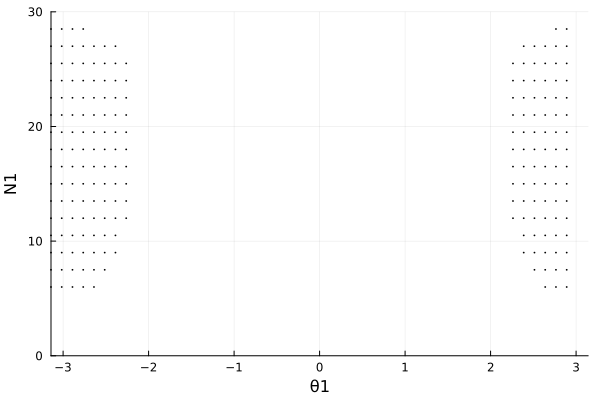

In [386]:
nQ = 20
nP = 50
ps = PhaseSpace(H, g!, E, nQ, nP, Plims, params, nrvar, tol, ite; nrdivs = 100)
println("El número de puntos con la energía deseada es $(size(ps, 1))")
scatter(ps[:, 3], ps[:, 1], ylims = (0, N), xlims = (-π,π), leg = false, xlabel = "θ1", ylabel = "N1", ms = 1.0, color = "black")

In [387]:
xr = psr[rand(1:size(psr,1)), :]

4-element Vector{Float64}:
 20.868065069785583
  8.748996503529451
 -2.2371021253552383
  0.0

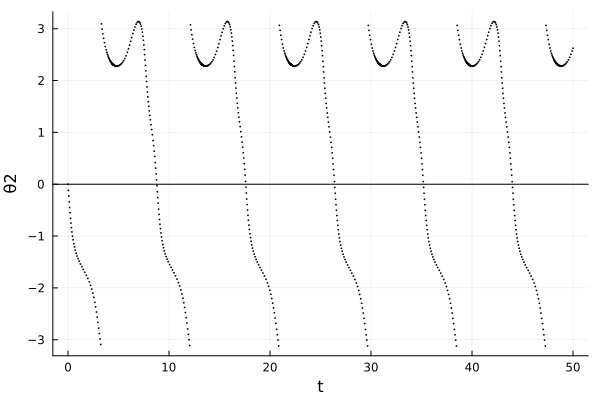

In [391]:
sol = taylorinteg(f!, xr, 0.0, 50.0, 20, 1.e-20, params, maxsteps = 10000)
scatter(sol.t, mod.(sol.x[:, 4] .+ π, 2π) .- π, leg = false, ylabel = "θ2", xlabel = "t", ms = 1.0, color = "black")
hline!([θ], color = "black")

In [392]:
function g(dx, x, p, t) 
    
    θ2 = constant_term(x[4])
    dθ2 = constant_term(dx[4])

    if abs(θ2 - π) < 0.5 || abs(θ2 + π) < 0.5

        return (false, x[4] - θ)

    end 

    if dθ2 > zero(θ2)

        return (true, x[4] - θ)

    else

        return (false, x[4] - θ)

    end

end

g (generic function with 1 method)

In [393]:
t0 = 0.0
tmax = 100.0

integorder = 20
integtol = 1.e-20

maxsteps = 50000

50000

In [394]:
T, S = PoincareSection(f!, H, g!, g, t0, tmax, integorder, integtol, maxsteps, E, nQ, nP, Plims, params, nrvar, tol, ite; nrdivs = 100);

Progreso: 100.0% 

  0.093986 seconds (52.41 k allocations: 3.150 MiB)


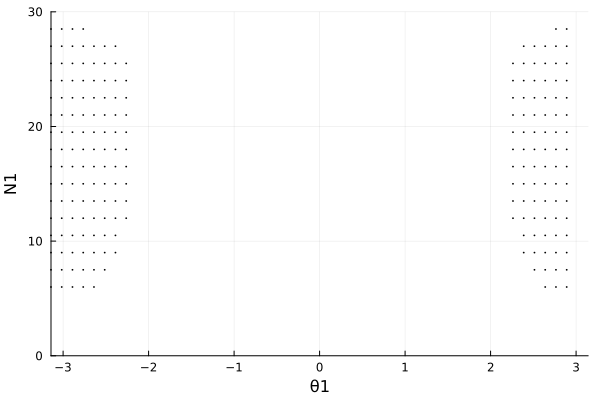

In [395]:
plot(ylims = (0, N), xlims = (-π,π), leg = false, xlabel = "θ1", ylabel = "N1")
n = length(T)
@time for i in 1:n
    scatter!(S[i][:, 3], S[i][:, 1], ms = 1.0, color = "black")
end

plot!()

In [417]:
rand(S)

1×4 Matrix{Float64}:
 27.0  2.89142  -2.38761  0.0